In [1]:
# first set path to library and import modules (not an installable library yet)
import sys
sys.path.append('D:/Projects phd/General scripts for proteomics/SILAC DIA pipeline/')
#import modules
import pandas as pd
from silac_dia_tools.label_check import file_io as io
from silac_dia_tools.label_check import process_peptides as peptide
from silac_dia_tools.label_check import plotting 

In [2]:
#path and file variables
raw_file = 'Fozzie_20230426_RJK_HS_vneo1_eif4fSpikeIn.raw'
path = "W:/RJK/label check script tests/eif4f/" 

In [3]:
#import MQ and thermo raw file data
msms = io.import_file(path + "msms.txt")
evidence = io.import_file(path + "evidence.txt")
ms1_df = io.get_raw_data(path, raw_file, 1000) 

[    1     2     3 ... 57678 57679 57680]


100%|██████████████████████████████████████████████████████████████████████████| 57680/57680 [00:46<00:00, 1244.80it/s]


In [4]:
#get most abundant K, R, and P containing peptides and return information to search raw file
peptides = peptide.get_most_abundant_KRP(msms,evidence) 
#combine data from MQ and thermo raw files with the option to save to a temp csv when adjusting plotting
for peptide_details in peptides:
    mz_values,intensity_values = peptide.extract_values(ms1_df, peptide_details)
    sequence = peptide_details['Sequence'].values[0]
    print(sequence)
    data = {"mz": mz_values,
            "intensity": intensity_values
            }
    df = pd.DataFrame(data)
    df.to_csv(path + "/temp data/" + sequence + ".csv", index=False)

AGFAGDDAPR
EIAQDFK
EIQTAVR


d:\projects phd\general scripts for proteomics\silac dia tools\src\silac_dia_tools\label_check\process_peptides.py:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sequence = df_sorted[condition].iloc[0]
d:\projects phd\general scripts for proteomics\silac dia tools\src\silac_dia_tools\label_check\process_peptides.py:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sequence = df_sorted[condition].iloc[0]


Extracted values:
mz: 488.727781
Expected light peak: 483.727781


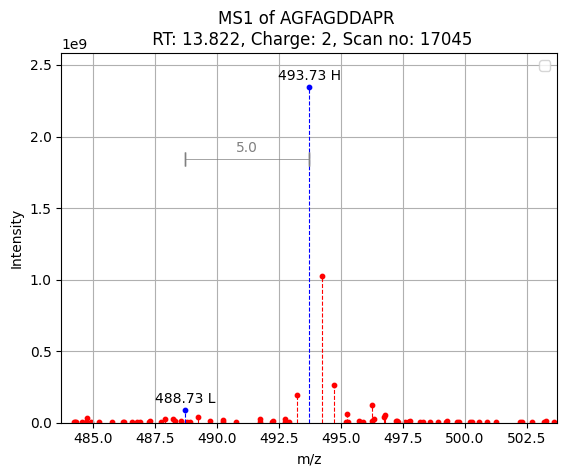

Extracted values:
mz: 425.718893
Expected light peak: 421.718893


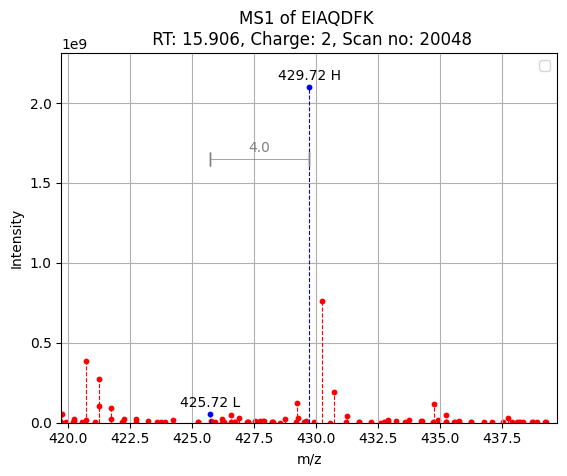

Extracted values:
mz: 408.732335
Expected light peak: 403.732335


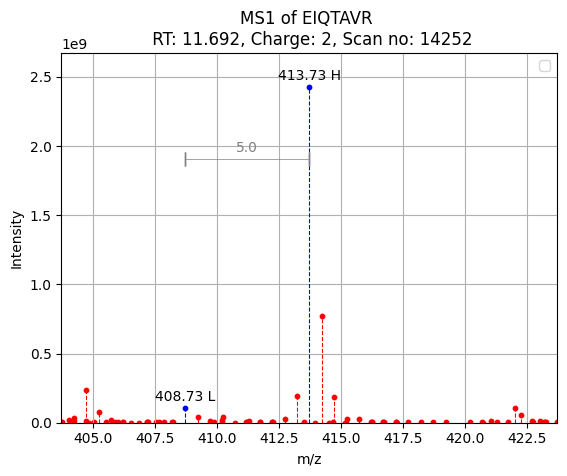

In [5]:
#loop through selected peptides and plot MS1 spectra
   
for peptide_details in peptides:
    sequence = peptide_details["Sequence"].values[0]
    retention_time = peptide_details["Retention_time"].values[0]
    charge = peptide_details["Charge"].values[0]
    mz = peptide_details["m/z"].values[0]
    # adjuest mz by precursor apex offset
  
    AA_mass = peptide_details["AA_mass"].values[0]
    scan_number = peptide_details["scan_number"].values[0]
    expected_light_peak = mz-(AA_mass/charge)
    
    # Print extracted values
    print("Extracted values:", flush=True)
    print("mz:", mz, flush=True)
    print("Expected light peak:", expected_light_peak, flush=True)
    
    sequence = peptide_details['Sequence'].values[0]
    df = pd.read_csv(path + "/temp data/" + sequence + ".csv")
    mz = df.mz
    intensity = df.intensity
    #plot each peptide
    plotting.scan_plot(mz, intensity, peptide_details)